In [1]:
# for response

from bs4 import BeautifulSoup
import requests

url = BeautifulSoup('https://www.scrapethissite.com/pages/simple/', 'html.parser')
soup = requests.get(url)

print(soup)

C:\Users\Acer\AppData\Local\Temp\ipykernel_20216\3654586495.py:6: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  url = BeautifulSoup('https://www.scrapethissite.com/pages/simple/', 'html.parser')


<Response [200]>


In [2]:
# changing the response into text

codes = soup.text
codes

'<!doctype html>\n<html lang="en">\n  <head>\n    <meta charset="utf-8">\n    <title>Countries of the World: A Simple Example | Scrape This Site | A public sandbox for learning web scraping</title>\n    <link rel="icon" type="image/png" href="/static/images/scraper-icon.png" />\n\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <meta name="description" content="A single page that lists information about all the countries in the world. Good for those just get started with web scraping.">\n\n    <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" rel="stylesheet" integrity="sha256-MfvZlkHCEqatNoGiOXveE8FIwMzZg4W85qfrfIFBfYc= sha512-dTfge/zgoMYpP7QbHy4gWMEGsbsdZeCXz7irItjcC3sPUFtf0kuFbDz/ixG7ArTxmDjLXDmezHubeNikyKGVyQ==" crossorigin="anonymous">\n    <link href=\'https://fonts.googleapis.com/css?family=Lato:400,700\' rel=\'stylesheet\' type=\'text/css\'>\n    <link rel="stylesheet" type="text/css" href="/static/css/styles.css"

In [3]:
# changing the text into lxml

codes = BeautifulSoup(codes, "lxml")
codes

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Countries of the World: A Simple Example | Scrape This Site | A public sandbox for learning web scraping</title>
<link href="/static/images/scraper-icon.png" rel="icon" type="image/png"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="A single page that lists information about all the countries in the world. Good for those just get started with web scraping." name="description"/>
<link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" integrity="sha256-MfvZlkHCEqatNoGiOXveE8FIwMzZg4W85qfrfIFBfYc= sha512-dTfge/zgoMYpP7QbHy4gWMEGsbsdZeCXz7irItjcC3sPUFtf0kuFbDz/ixG7ArTxmDjLXDmezHubeNikyKGVyQ==" rel="stylesheet"/>
<link href="https://fonts.googleapis.com/css?family=Lato:400,700" rel="stylesheet" type="text/css"/>
<link href="/static/css/styles.css" rel="stylesheet" type="text/css"/>
<meta content="noindex" name="robots"/>
<link hr

In [4]:
# to get the codes with the common class name

tags = codes.find_all(class_ = 'col-md-4 country')
tags

[<div class="col-md-4 country">
 <h3 class="country-name">
 <i class="flag-icon flag-icon-ad"></i>
                             Andorra
                         </h3>
 <div class="country-info">
 <strong>Capital:</strong> <span class="country-capital">Andorra la Vella</span><br/>
 <strong>Population:</strong> <span class="country-population">84000</span><br/>
 <strong>Area (km<sup>2</sup>):</strong> <span class="country-area">468.0</span><br/>
 </div>
 </div>,
 <div class="col-md-4 country">
 <h3 class="country-name">
 <i class="flag-icon flag-icon-ae"></i>
                             United Arab Emirates
                         </h3>
 <div class="country-info">
 <strong>Capital:</strong> <span class="country-capital">Abu Dhabi</span><br/>
 <strong>Population:</strong> <span class="country-population">4975593</span><br/>
 <strong>Area (km<sup>2</sup>):</strong> <span class="country-area">82880.0</span><br/>
 </div>
 </div>,
 <div class="col-md-4 country">
 <h3 class="country-name">
 

In [5]:
# to get only the data in form of text and store them in a list

data = []
for i in tags:
    d = i.text
    data.append(d)

data

['\n\n\n                            Andorra\n                        \n\nCapital: Andorra la Vella\nPopulation: 84000\nArea (km2): 468.0\n\n',
 '\n\n\n                            United Arab Emirates\n                        \n\nCapital: Abu Dhabi\nPopulation: 4975593\nArea (km2): 82880.0\n\n',
 '\n\n\n                            Afghanistan\n                        \n\nCapital: Kabul\nPopulation: 29121286\nArea (km2): 647500.0\n\n',
 "\n\n\n                            Antigua and Barbuda\n                        \n\nCapital: St. John's\nPopulation: 86754\nArea (km2): 443.0\n\n",
 '\n\n\n                            Anguilla\n                        \n\nCapital: The Valley\nPopulation: 13254\nArea (km2): 102.0\n\n',
 '\n\n\n                            Albania\n                        \n\nCapital: Tirana\nPopulation: 2986952\nArea (km2): 28748.0\n\n',
 '\n\n\n                            Armenia\n                        \n\nCapital: Yerevan\nPopulation: 2968000\nArea (km2): 29800.0\n\n',


In [21]:
# to split each element and removing extra space

split_data = []
cols = ["Country", "Capital", "Population", "Area (km2)"]
for i in data:
    x = (i.replace("                            ","").split("\n"))

# to delete empty element
    
    del x[4:6]

# to remove table header
    y = x[3:-2]
    y[1] = y[1].replace("Capital: ","")
    y[2] = y[2].replace("Population: ","")
    y[-1] = y[-1].replace("Area (km2): ","")

    y[-1] = float(y[-1])
    y[-2] = int(y[-2])
    
    print(y)

#to create list inside list
    
    split_data.append(y)


['Andorra', 'Andorra la Vella', 84000, 468.0]
['United Arab Emirates', 'Abu Dhabi', 4975593, 82880.0]
['Afghanistan', 'Kabul', 29121286, 647500.0]
['Antigua and Barbuda', "St. John's", 86754, 443.0]
['Anguilla', 'The Valley', 13254, 102.0]
['Albania', 'Tirana', 2986952, 28748.0]
['Armenia', 'Yerevan', 2968000, 29800.0]
['Angola', 'Luanda', 13068161, 1246700.0]
['Antarctica', 'None', 0, 14000000.0]
['Argentina', 'Buenos Aires', 41343201, 2766890.0]
['American Samoa', 'Pago Pago', 57881, 199.0]
['Austria', 'Vienna', 8205000, 83858.0]
['Australia', 'Canberra', 21515754, 7686850.0]
['Aruba', 'Oranjestad', 71566, 193.0]
['Åland', 'Mariehamn', 26711, 1580.0]
['Azerbaijan', 'Baku', 8303512, 86600.0]
['Bosnia and Herzegovina', 'Sarajevo', 4590000, 51129.0]
['Barbados', 'Bridgetown', 285653, 431.0]
['Bangladesh', 'Dhaka', 156118464, 144000.0]
['Belgium', 'Brussels', 10403000, 30510.0]
['Burkina Faso', 'Ouagadougou', 16241811, 274200.0]
['Bulgaria', 'Sofia', 7148785, 110910.0]
['Bahrain', 'Manam

In [16]:
# list inside list

split_data

[['Andorra', 'Andorra la Vella', 84000, 468.0],
 ['United Arab Emirates', 'Abu Dhabi', 4975593, 82880.0],
 ['Afghanistan', 'Kabul', 29121286, 647500.0],
 ['Antigua and Barbuda', "St. John's", 86754, 443.0],
 ['Anguilla', 'The Valley', 13254, 102.0],
 ['Albania', 'Tirana', 2986952, 28748.0],
 ['Armenia', 'Yerevan', 2968000, 29800.0],
 ['Angola', 'Luanda', 13068161, 1246700.0],
 ['Antarctica', 'None', 0, 14000000.0],
 ['Argentina', 'Buenos Aires', 41343201, 2766890.0],
 ['American Samoa', 'Pago Pago', 57881, 199.0],
 ['Austria', 'Vienna', 8205000, 83858.0],
 ['Australia', 'Canberra', 21515754, 7686850.0],
 ['Aruba', 'Oranjestad', 71566, 193.0],
 ['Åland', 'Mariehamn', 26711, 1580.0],
 ['Azerbaijan', 'Baku', 8303512, 86600.0],
 ['Bosnia and Herzegovina', 'Sarajevo', 4590000, 51129.0],
 ['Barbados', 'Bridgetown', 285653, 431.0],
 ['Bangladesh', 'Dhaka', 156118464, 144000.0],
 ['Belgium', 'Brussels', 10403000, 30510.0],
 ['Burkina Faso', 'Ouagadougou', 16241811, 274200.0],
 ['Bulgaria', 'So

In [17]:
# converting into tabular data

import  pandas as pd
df = pd.DataFrame(split_data, columns = cols)
df


,Country,Capital,Population,Area (km2)
0,Andorra,Andorra la Vella,84000,468.0
1,United Arab Emirates,Abu Dhabi,4975593,82880.0
2,Afghanistan,Kabul,29121286,647500.0
3,Antigua and Barbuda,St. John's,86754,443.0
4,Anguilla,The Valley,13254,102.0
...,...,...,...,...
245,Yemen,Sanaa,23495361,527970.0
246,Mayotte,Mamoudzou,159042,374.0
247,South Africa,Pretoria,49000000,1219912.0
248,Zambia,Lusaka,13460305,752614.0


In [18]:
# creating csv file of tabular data

df.to_csv('Countries_info.csv', index = False)

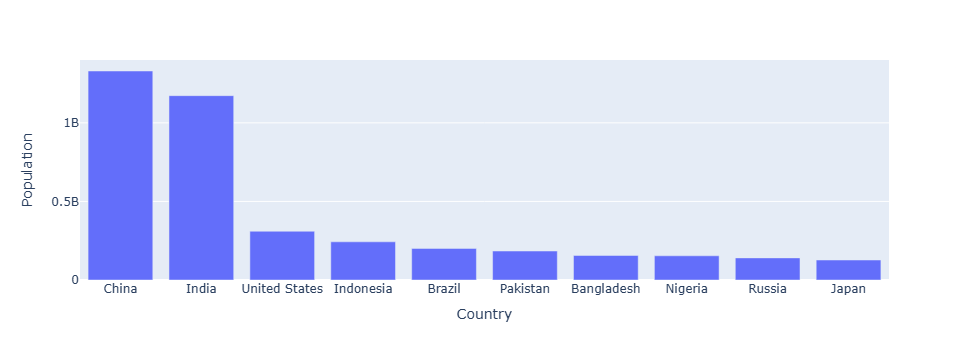

In [19]:
# visulaization

import plotly.express as px

plot_df = df.sort_values(by = "Population", ascending = False).head(10)
fig = px.bar(plot_df, x='Country', y='Population')
fig.show()

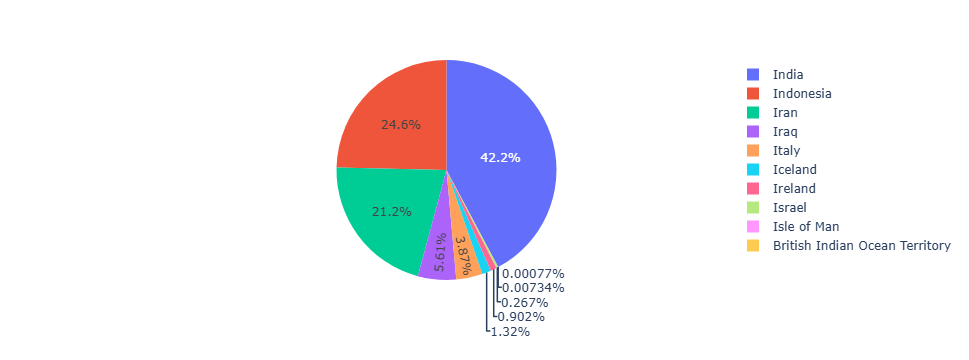

In [20]:
fig = px.pie(df.iloc[100:110], values='Area (km2)', names='Country')
fig.show()